# Which one is a better plan?

**Project Goal**
The company Megaline offers its clients two prepaid plans, Surf and Ultimate. The commercial department wants to know which of the plans brings in more revenue in order to adjust the advertising budget.

**Project Description**
Megaline provided data on 500 Megaline clients: who the clients are, where they're from, which plan they use, and the number of calls they made and text messages they sent in 2018. I will be analyzing the clients' behavior to determine which prepaid plan brings in more revenue.

**Project Plan**
* Examine the tables provided by Megaline. 
* Preprocess the data to ensure the data is ready for analysis. This will include checking for missing data, duplicated rows and the appropriate data types.
* Calculate the total revenue according to each plan.
* Conduct a statistical analysis to determine if there is a significant difference between the means of each plan's revenue data. 

## Initialization

In [1]:
# Loads all the libraries needed for analysis 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy import stats as st
import sys
import warnings
if not sys.warnoptions:
        warnings.simplefilter("ignore");  


## Load data

In [2]:
# Loads the data files into DataFrames
call_data = pd.read_csv('/datasets/megaline_calls.csv')
internet_data = pd.read_csv('/datasets/megaline_internet.csv')
message_data = pd.read_csv('/datasets/megaline_messages.csv')
plan_data = pd.read_csv('/datasets/megaline_plans.csv') 
user_data = pd.read_csv('/datasets/megaline_users.csv')


## Prepare the data

In the seconds below, I look at each table and prepare it for analysis, which includes looking for missing data, duplicated rows and appropriate data types. 

## Plans

In [3]:
# Print the general/summary information about the plans' DataFrame

plan_data.shape

plan_data.info()

plan_data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
usd_monthly_pay          2 non-null int64
usd_per_gb               2 non-null int64
usd_per_message          2 non-null float64
usd_per_minute           2 non-null float64
plan_name                2 non-null object
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


messages_included        0
mb_per_month_included    0
minutes_included         0
usd_monthly_pay          0
usd_per_gb               0
usd_per_message          0
usd_per_minute           0
plan_name                0
dtype: int64

In [4]:
# Print a sample of data for plans

plan_data.head()


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


**Initial Observations**
* The plans dataframe appears to be a summary of the two plans: Surf and Ultimate.
* There are only two rows and no null values. 
* It appears that one of the plans is more expensive but includes more messages, MB per month and minutes.
* All of the data types seem to make sense.

Based on the above observations, no changes were needed.

## Users

In [5]:
# Prints the general/summary information about the users' DataFrame

user_data.shape

user_data.info()

user_data.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
first_name    500 non-null object
last_name     500 non-null object
age           500 non-null int64
city          500 non-null object
reg_date      500 non-null object
plan          500 non-null object
churn_date    34 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


user_id         0
first_name      0
last_name       0
age             0
city            0
reg_date        0
plan            0
churn_date    466
dtype: int64

In [6]:
# Prints a sample of data for users

user_data.head(10)


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN
5,1005,Livia,Shields,31,"Dallas-Fort Worth-Arlington, TX MSA",2018-11-29,surf,NaN
6,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18
7,1007,Eusebio,Welch,42,"Grand Rapids-Kentwood, MI MSA",2018-07-11,surf,NaN
8,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,NaN
9,1009,Gerry,Little,19,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-04-22,surf,NaN


In [7]:
# Checks for duplicates

user_data.duplicated().sum()

0

In [8]:
# Looks at overall description of the quantitative data from the table

user_data.describe()

,user_id,age
count,500.000000,500.000000
mean,1249.500000,45.486000
std,144.481833,16.972269
min,1000.000000,18.000000
25%,1124.750000,30.000000
50%,1249.500000,46.000000
75%,1374.250000,61.000000
max,1499.000000,75.000000


**Initial observations**
* There are many null values in the 'churn_data' column. Since this column indicates the datas of cancellation, I will assume that null values represent plans that are still active. I would like to convert this column to a datetime object so that it can be used in analysis if needed. Therefore, I will leave the null values as null.
* There are no duplicate rows.
* The describe function doesn't provide us much information at this point, since age could vary per region or plan type. But it is helpful to see that the overall average age is 45, with a large range of 18-75.
* I will convert the date to a datetime object. 
* The city column is too complicated for analysis and needs to be simplified into regions.
* I will add a column that indicates only the month. 

### Fix Data

In [9]:
# Fills in null values

user_data.isna().sum() # Looks at number of missing values in each column 

user_data.isna().sum() / len(user_data) * 100 # Looks at percentage of missing values in each column

user_id        0.0
first_name     0.0
last_name      0.0
age            0.0
city           0.0
reg_date       0.0
plan           0.0
churn_date    93.2
dtype: float64

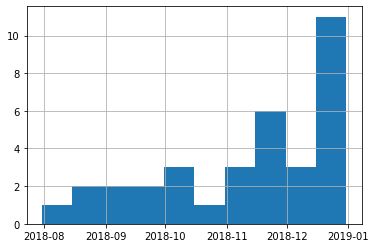

In [10]:
user_data['churn_date'] = pd.to_datetime(user_data['churn_date'], format='%Y-%m-%d') # Converts 'churn_date' to a datetime object

user_data.loc[user_data['churn_date'].isna()] # Looks at only rows that have missing values in "churn_date"

user_data['churn_date'].hist(bins=10);

# df[‘column’] = df[‘column'].fillna(0)

In [11]:
# Converts the reg_date to a datetime object. 

user_data['reg_date'] = pd.to_datetime(user_data['reg_date'], format='%Y-%m-%d')


In [12]:
# Checks if the date column successfully converted to a datetime object

user_data.info()

user_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
first_name    500 non-null object
last_name     500 non-null object
age           500 non-null int64
city          500 non-null object
reg_date      500 non-null datetime64[ns]
plan          500 non-null object
churn_date    34 non-null datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaT
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaT
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaT


### Enrich Data

In [13]:
user_data['city'].unique()

array(['Atlanta-Sandy Springs-Roswell, GA MSA',
       'Seattle-Tacoma-Bellevue, WA MSA',
       'Las Vegas-Henderson-Paradise, NV MSA', 'Tulsa, OK MSA',
       'Dallas-Fort Worth-Arlington, TX MSA',
       'San Francisco-Oakland-Berkeley, CA MSA',
       'Grand Rapids-Kentwood, MI MSA',
       'Orlando-Kissimmee-Sanford, FL MSA',
       'San Jose-Sunnyvale-Santa Clara, CA MSA',
       'Cleveland-Elyria, OH MSA',
       'Chicago-Naperville-Elgin, IL-IN-WI MSA', 'Knoxville, TN MSA',
       'New York-Newark-Jersey City, NY-NJ-PA MSA', 'Pittsburgh, PA MSA',
       'Fresno, CA MSA',
       'Washington-Arlington-Alexandria, DC-VA-MD-WV MSA',
       'Indianapolis-Carmel-Anderson, IN MSA', 'Jacksonville, FL MSA',
       'Los Angeles-Long Beach-Anaheim, CA MSA',
       'Omaha-Council Bluffs, NE-IA MSA',
       'Houston-The Woodlands-Sugar Land, TX MSA',
       'Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA',
       'Tampa-St. Petersburg-Clearwater, FL MSA',
       'Birmingham-Hoover, AL MSA'

In [14]:
# Adds a key that indicates the region

def region(row): # Creates a function that replaces the values in the column condition with values 
    state = row['city']
    if 'NY' in state:
        return 'NY-NJ'
    elif 'NY-NJ-PA' in state:
        return 'NY-NJ'
    elif 'NJ' in state:
        return 'NY-NJ'
    else:
        return 'Other'

In [15]:
# Tests the function
row_values = ['New York-Newark-Jersey City, NY-NJ-PA MSA'] # Creates a list that indicates row value
row_columns = ['city'] # Creates list that indicates column name

row = pd.Series(data=row_values, index=row_columns) # Creates a new row with the above values

print(region(row)) # Passes the row through the function

NY-NJ


In [16]:
# Pass the function
user_data['region'] = user_data.apply(region, axis=1)

In [17]:
# Check on new column

user_data.head(10)

user_data['region'].unique()

user_data.groupby('region')['user_id'].count()

region
NY-NJ    103
Other    397
Name: user_id, dtype: int64

In [18]:
# Creates a new column that indicates only month

user_data['month'] = pd.DatetimeIndex(user_data['reg_date']).month

user_data.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,region,month
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,Other,12
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,Other,8
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaT,Other,10
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaT,Other,1
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaT,Other,5


## Calls

In [19]:
# Print the general/summary information about the calls' DataFrame

call_data.shape

call_data.info()

call_data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
id           137735 non-null object
user_id      137735 non-null int64
call_date    137735 non-null object
duration     137735 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


id           0
user_id      0
call_date    0
duration     0
dtype: int64

In [20]:
# Print a sample of data for calls

call_data.head(10)

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22
5,1000_388,1000,2018-12-31,2.20
6,1000_510,1000,2018-12-27,5.75
7,1000_521,1000,2018-12-28,14.18
8,1000_530,1000,2018-12-28,5.77
9,1000_544,1000,2018-12-26,4.40


In [21]:
# Checks for duplicates

call_data.duplicated().sum()

0

In [22]:
# Looks at overall description of the quantitative data from the table

call_data.describe()

,user_id,duration
count,137735.000000,137735.000000
mean,1247.658046,6.745927
std,139.416268,5.839241
min,1000.000000,0.000000
25%,1128.000000,1.290000
50%,1247.000000,5.980000
75%,1365.000000,10.690000
max,1499.000000,37.600000


**Initial Observations**
* There are no null values.
* There are no duplicated rows.
* I will convert call_date to a dateime object.
* I will add a columnt that indicates only the month. 

### Fix data

In [23]:
# Converts the call_date column to a datetime object

call_data['call_date'] = pd.to_datetime(call_data['call_date'], format='%Y-%m-%d')

In [24]:
# Checks if the date column successfully converted to a datetime object

call_data.info()

call_data.head()

call_data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
id           137735 non-null object
user_id      137735 non-null int64
call_date    137735 non-null datetime64[ns]
duration     137735 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB


id           0
user_id      0
call_date    0
duration     0
dtype: int64

### Enrich data

In [25]:
# Adds a column that includes only the month.

call_data['month'] = pd.DatetimeIndex(call_data['call_date']).month

call_data.head()

,id,user_id,call_date,duration,month
0,1000_93,1000,2018-12-27,8.52,12
1,1000_145,1000,2018-12-27,13.66,12
2,1000_247,1000,2018-12-27,14.48,12
3,1000_309,1000,2018-12-28,5.76,12
4,1000_380,1000,2018-12-30,4.22,12


## Messages

In [26]:
# Print the general/summary information about the messages DataFrame

message_data.shape

message_data.info()

message_data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
id              76051 non-null object
user_id         76051 non-null int64
message_date    76051 non-null object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


id              0
user_id         0
message_date    0
dtype: int64

In [27]:
# Print a sample of data for messages

message_data.head(10)

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26
5,1000_346,1000,2018-12-29
6,1000_386,1000,2018-12-30
7,1000_413,1000,2018-12-31
8,1000_502,1000,2018-12-27
9,1000_525,1000,2018-12-28


In [28]:
# Checks for duplicates

message_data.duplicated().sum()

0

**Initial Observations**
* There are no null values. 
* The table shares "user_id" column with the user and call tables, and shares the "id" column with the calls table. 
* There are no duplicates.
* I will convert the "message_date" column to a datetime object.
* I will add a column that indicates only the month.


### Fix data

In [29]:
# Converts the message_date column to a datetime object

message_data['message_date'] = pd.to_datetime(message_data['message_date'], format='%Y-%m-%d')

In [30]:
# Checks if the date column successfully converted to a datetime object

message_data.info()

message_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
id              76051 non-null object
user_id         76051 non-null int64
message_date    76051 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


### Enrich data

In [31]:
# Adds a column that indicates only the month

message_data['month'] = pd.DatetimeIndex(message_data['message_date']).month

message_data.head()

,id,user_id,message_date,month
0,1000_125,1000,2018-12-27,12
1,1000_160,1000,2018-12-31,12
2,1000_223,1000,2018-12-31,12
3,1000_251,1000,2018-12-27,12
4,1000_255,1000,2018-12-26,12


## Internet

In [32]:
# Print the general/summary information about the internet DataFrame

internet_data.shape

internet_data.info()

internet_data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
id              104825 non-null object
user_id         104825 non-null int64
session_date    104825 non-null object
mb_used         104825 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


id              0
user_id         0
session_date    0
mb_used         0
dtype: int64

In [33]:
# Print a sample of data for the internet traffic

internet_data.head(10)

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22
5,1001_0,1001,2018-08-24,284.68
6,1001_3,1001,2018-12-09,656.04
7,1001_4,1001,2018-11-04,16.97
8,1001_10,1001,2018-11-27,135.18
9,1001_15,1001,2018-12-13,761.92


In [34]:
# Checks for duplicates

internet_data.duplicated().sum()

0

**Initial Observations**
* There are no null values.
* There are no duplicates.
* I will convert the "session_date" column to a datetime object. 
* I will add a column that indicates only the month.

### Fix data

In [35]:
# Converts the message_date column to a datetime object

internet_data['session_date'] = pd.to_datetime(internet_data['session_date'], format='%Y-%m-%d')

In [36]:
# Checks if the date column successfully converted to a datetime object

internet_data.info()

internet_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
id              104825 non-null object
user_id         104825 non-null int64
session_date    104825 non-null datetime64[ns]
mb_used         104825 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB


,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


### Enrich data

In [37]:
internet_data['month'] = pd.DatetimeIndex(internet_data['session_date']).month

internet_data.head()

,id,user_id,session_date,mb_used,month
0,1000_13,1000,2018-12-29,89.86,12
1,1000_204,1000,2018-12-31,0.00,12
2,1000_379,1000,2018-12-28,660.40,12
3,1000_413,1000,2018-12-26,270.99,12
4,1000_442,1000,2018-12-27,880.22,12


## Study plan conditions

In [38]:
# Print out the plan conditions and make sure they are clear as we continue analysis

plan_data

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [39]:
# Calculates the number of calls and the duration of calls made by each user per month. Saves the result into calls_monthly. 

calls_monthly = call_data.pivot_table(index = ('user_id','month'), values = 'id', aggfunc = 'count').reset_index()

calls_monthly.rename(columns={'id':'monthly_calls'},inplace=True) # Renames column to be more clear

calls_monthly.head()


,user_id,month,monthly_calls
0,1000,12,16
1,1001,8,27
2,1001,9,49
3,1001,10,65
4,1001,11,64


In [40]:
# Calculates the amount of minutes spent by each user per month. Saves the result into minutes_monthly.

call_data['duration'] = call_data['duration'].apply(np.ceil) # Rounds the duration column up to the minute

minutes_monthly = call_data.pivot_table(index = ('user_id','month'), values = 'duration', aggfunc = ('sum')).reset_index()

minutes_monthly.rename(columns={'duration':'monthly_minutes'},inplace=True) # Renames column to be more clear

minutes_monthly.head()


,user_id,month,monthly_minutes
0,1000,12,124.0
1,1001,8,182.0
2,1001,9,315.0
3,1001,10,393.0
4,1001,11,426.0


In [41]:
# Calculates the number of messages sent by each user per month. Saves the result into messages_monthly.

message_data.head()

messages_monthly = call_data.pivot_table(index = ('user_id','month'), values = 'id', aggfunc = ('count')).reset_index()

messages_monthly.rename(columns={'id':'monthly_messages'},inplace=True) # Renames column to be more clear

messages_monthly.head()


,user_id,month,monthly_messages
0,1000,12,16
1,1001,8,27
2,1001,9,49
3,1001,10,65
4,1001,11,64


In [42]:
# Calculates the volume of internet traffic used by each user per month. Saves the result into internet_volume_mb.

internet_data.head()

internet_volume = internet_data.pivot_table(index = ('user_id','month'), values = 'mb_used', aggfunc = ('sum')).reset_index()

internet_volume.rename(columns={'mb_used':'internet_mb'},inplace=True) # Renames column to be more clear

internet_volume.head()


,user_id,month,internet_mb
0,1000,12,1901.47
1,1001,8,6919.15
2,1001,9,13314.82
3,1001,10,22330.49
4,1001,11,18504.30


In [43]:
# Merges the data for calls, minutes, messages, internet based on user_id and month

user_data_total = calls_monthly.merge(minutes_monthly, on=['user_id', 'month'], how='outer')  

user_data_total.head()

user_data_total = user_data_total.merge(messages_monthly, on=['user_id', 'month'], how='outer')

user_data_total.head()

user_data_total = user_data_total.merge(internet_volume, on=['user_id', 'month'], how='outer')

user_data_total.head()

,user_id,month,monthly_calls,monthly_minutes,monthly_messages,internet_mb
0,1000,12,16.0,124.0,16.0,1901.47
1,1001,8,27.0,182.0,27.0,6919.15
2,1001,9,49.0,315.0,49.0,13314.82
3,1001,10,65.0,393.0,65.0,22330.49
4,1001,11,64.0,426.0,64.0,18504.30


In [44]:
# Adds the plan information

user_data_plan = user_data[['user_id','plan']]

user_data_plan.head()

user_data_total = user_data_total.merge(user_data_plan, on=['user_id'], how='outer')

user_data_total.head()


,user_id,month,monthly_calls,monthly_minutes,monthly_messages,internet_mb,plan
0,1000,12.0,16.0,124.0,16.0,1901.47,ultimate
1,1001,8.0,27.0,182.0,27.0,6919.15,surf
2,1001,9.0,49.0,315.0,49.0,13314.82,surf
3,1001,10.0,65.0,393.0,65.0,22330.49,surf
4,1001,11.0,64.0,426.0,64.0,18504.30,surf


**Calculating monthly revenue**

To calculate the monthly revenue for each user, I will:
* Subtract the free package limit from the total number of calls, text messages, and data
* Multiply the result by the calling plan value
* Add the monthly charge depending on the calling plan

In [45]:
# Reminds us of the plan data details

plan_data

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


**Surf Users: Calculating Monthly Revenue**

In [46]:
# Creates a dataframe with only Surf plan users

surf_users = user_data_total.loc[user_data_total['plan'] == "surf"] # Creates a dataframe with only Surf plan users

In [47]:
# Calculates message revenue

def surf_message(row): # Creates a function that replaces the values in the column condition with values 
    monthly_messages = row['monthly_messages']
    surf_mess_free = plan_data.iloc[0]['messages_included']
    surf_usd_per_mess = plan_data.iloc[0]['usd_per_message']
    if monthly_messages - surf_mess_free > 0:
        return (monthly_messages - surf_mess_free) * surf_usd_per_mess
    else: 
        return 0

In [48]:
# Tests the function

row_values = [100] # Creates a list that indicates row value
row_columns = ['monthly_messages'] # Creates list that indicates column name

row = pd.Series(data=row_values, index=row_columns) # Creates a new row with the above values

print(surf_message(row)) # Passes the row through the function

1.5


In [49]:
# Passes the function to the surf_users table

surf_users['message_revenue'] = surf_users.apply(surf_message, axis=1) # Pass the function


In [50]:
# Calculates call revenue

def surf_minutes(row): # Creates a function that replaces the values in the column condition with values 
    monthly_minutes = row['monthly_minutes']
    surf_min_free = plan_data.iloc[0]['minutes_included']
    surf_usd_per_min = plan_data.iloc[0]['usd_per_minute']
    if monthly_minutes - surf_min_free > 0:
        return (monthly_minutes - surf_min_free) * surf_usd_per_min
    else: 
        return 0

In [51]:
# Tests the function

row_values = [1000] # Creates a list that indicates row value
row_columns = ['monthly_minutes'] # Creates list that indicates column name

row = pd.Series(data=row_values, index=row_columns) # Creates a new row with the above values

print(surf_minutes(row)) # Passes the row through the function

15.0


In [52]:
# Passes the function to the surf_users table

surf_users['call_revenue'] = surf_users.apply(surf_minutes, axis=1) # Pass the function

surf_users.sort_values(by='call_revenue', ascending=False)

,user_id,month,monthly_calls,monthly_minutes,monthly_messages,internet_mb,plan,message_revenue,call_revenue
1244,1267,12.0,205.0,1510.0,205.0,37544.16,surf,4.65,30.30
1673,1365,12.0,180.0,1357.0,180.0,8219.25,surf,3.90,25.71
1462,1324,11.0,171.0,1304.0,171.0,18287.93,surf,3.63,24.12
1671,1365,10.0,161.0,1227.0,161.0,9291.87,surf,3.33,21.81
1102,1240,9.0,180.0,1212.0,180.0,30851.55,surf,3.90,21.36
...,...,...,...,...,...,...,...,...,...
905,1193,8.0,32.0,236.0,32.0,19486.58,surf,0.00,0.00
904,1193,7.0,29.0,179.0,29.0,14158.63,surf,0.00,0.00
901,1192,10.0,69.0,437.0,69.0,8520.78,surf,0.57,0.00
891,1189,12.0,40.0,356.0,40.0,20546.39,surf,0.00,0.00


In [53]:
# Add column for only gbs that will be charged, rounding up to nearest gb

surf_users['internet_gb_charged'] = ((surf_users['internet_mb'] - plan_data.iloc[0]['mb_per_month_included']) / 1024).apply(np.ceil)

surf_users.head()


,user_id,month,monthly_calls,monthly_minutes,monthly_messages,internet_mb,plan,message_revenue,call_revenue,internet_gb_charged
1,1001,8.0,27.0,182.0,27.0,6919.15,surf,0.00,0.0,-8.0
2,1001,9.0,49.0,315.0,49.0,13314.82,surf,0.00,0.0,-1.0
3,1001,10.0,65.0,393.0,65.0,22330.49,surf,0.45,0.0,7.0
4,1001,11.0,64.0,426.0,64.0,18504.30,surf,0.42,0.0,4.0
5,1001,12.0,56.0,412.0,56.0,19369.18,surf,0.18,0.0,4.0


In [54]:
# Calculates internet revenue

def surf_internet(row): # Creates a function that replaces the values in the column condition with values 
    monthly_gb = row['internet_gb_charged']
    surf_usd_per_gb = plan_data.iloc[0]['usd_per_gb']
    if monthly_gb > 0:
        return (monthly_gb * surf_usd_per_gb)
    else:
        return 0

In [55]:
# Tests the function

row_values = [7] # Creates a list that indicates row value
row_columns = ['internet_gb_charged'] # Creates list that indicates column name

row = pd.Series(data=row_values, index=row_columns) # Creates a new row with the above values

print(surf_internet(row)) # Passes the row through the function

70


In [56]:
# Passes the function to the surf_users table

surf_users['internet_revenue'] = surf_users.apply(surf_internet, axis=1) # Pass the function

surf_users.sort_values(by='internet_revenue', ascending=False)

,user_id,month,monthly_calls,monthly_minutes,monthly_messages,internet_mb,plan,message_revenue,call_revenue,internet_gb_charged,internet_revenue
1726,1379,12.0,144.0,1103.0,144.0,70931.59,surf,2.82,18.09,55.0,550.0
2270,1121,12.0,NaN,NaN,NaN,66863.89,surf,0.00,0.00,51.0,510.0
1334,1292,12.0,28.0,144.0,28.0,52034.66,surf,0.00,0.00,36.0,360.0
1330,1292,8.0,42.0,323.0,42.0,51809.35,surf,0.00,0.00,36.0,360.0
1101,1240,8.0,161.0,1095.0,161.0,49950.58,surf,3.33,17.85,34.0,340.0
...,...,...,...,...,...,...,...,...,...,...,...
1122,1245,11.0,29.0,181.0,29.0,12283.49,surf,0.00,0.00,-3.0,0.0
1123,1245,12.0,50.0,374.0,50.0,4821.57,surf,0.00,0.00,-10.0,0.0
1138,1248,11.0,12.0,99.0,12.0,1869.23,surf,0.00,0.00,-13.0,0.0
1149,1251,3.0,28.0,247.0,28.0,13867.94,surf,0.00,0.00,-1.0,0.0


In [57]:
# Calculate total revenue

surf_users['total_revenue'] = 20 + surf_users['message_revenue'] + surf_users['call_revenue'] + surf_users['internet_revenue']

user_data_total['surf_revenue'] = surf_users['total_revenue']

user_data_total.head()


,user_id,month,monthly_calls,monthly_minutes,monthly_messages,internet_mb,plan,surf_revenue
0,1000,12.0,16.0,124.0,16.0,1901.47,ultimate,NaN
1,1001,8.0,27.0,182.0,27.0,6919.15,surf,20.00
2,1001,9.0,49.0,315.0,49.0,13314.82,surf,20.00
3,1001,10.0,65.0,393.0,65.0,22330.49,surf,90.45
4,1001,11.0,64.0,426.0,64.0,18504.30,surf,60.42


**Ultimate Users: Calculating Monthly Revenue**

In [58]:
# Reprints the plan data to remind us of parameters

plan_data

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [59]:
# Creates a dataframe with only Ultimate plan users

ultimate_users = user_data_total.loc[user_data_total['plan'] == "ultimate"] # Creates a dataframe with only Ultimate plan users

In [60]:
# Calculates message revenue

def ult_message(row): # Creates a function that replaces the values in the column condition with values 
    monthly_messages = row['monthly_messages']
    ult_mess_free = plan_data.iloc[1]['messages_included']
    ult_usd_per_mess = plan_data.iloc[1]['usd_per_message']
    if monthly_messages - ult_mess_free > 0:
        return (monthly_messages - ult_mess_free) * ult_usd_per_mess
    else: 
        return 0

In [61]:
# Tests the function

row_values = [2000] # Creates a list that indicates row value
row_columns = ['monthly_messages'] # Creates list that indicates column name

row = pd.Series(data=row_values, index=row_columns) # Creates a new row with the above values

print(ult_message(row)) # Passes the row through the function

10.0


In [62]:
# Passes the function to the ultimate_users table

ultimate_users['message_revenue'] = ultimate_users.apply(ult_message, axis=1) # Pass the function

In [63]:
# Calculates call revenue

def ult_minutes(row): # Creates a function that replaces the values in the column condition with values 
    monthly_minutes = row['monthly_minutes']
    ult_min_free = plan_data.iloc[1]['minutes_included']
    ult_usd_per_min = plan_data.iloc[1]['usd_per_minute']
    if monthly_minutes - ult_min_free > 0:
        return (monthly_minutes - ult_min_free) * ult_usd_per_min
    else: 
        return 0

In [64]:
# Tests the function

row_values = [5000] # Creates a list that indicates row value
row_columns = ['monthly_minutes'] # Creates list that indicates column name

row = pd.Series(data=row_values, index=row_columns) # Creates a new row with the above values

print(ult_minutes(row)) # Passes the row through the function

20.0


In [65]:
# Passes the function to the ultimate_users table

ultimate_users['call_revenue'] = ultimate_users.apply(ult_minutes, axis=1) # Pass the function

ultimate_users.sort_values(by='call_revenue', ascending=False)

,user_id,month,monthly_calls,monthly_minutes,monthly_messages,internet_mb,plan,surf_revenue,message_revenue,call_revenue
0,1000,12.0,16.0,124.0,16.0,1901.47,ultimate,NaN,0,0
1686,1368,6.0,93.0,719.0,93.0,18506.74,ultimate,NaN,0,0
1688,1368,8.0,77.0,545.0,77.0,15974.84,ultimate,NaN,0,0
1689,1368,9.0,68.0,520.0,68.0,16097.13,ultimate,NaN,0,0
1690,1368,10.0,78.0,501.0,78.0,15748.13,ultimate,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...
760,1163,8.0,52.0,385.0,52.0,12166.45,ultimate,NaN,0,0
761,1163,9.0,68.0,432.0,68.0,14821.54,ultimate,NaN,0,0
762,1163,10.0,82.0,714.0,82.0,19785.31,ultimate,NaN,0,0
763,1163,11.0,82.0,584.0,82.0,26548.26,ultimate,NaN,0,0


In [66]:
# Add column for only gbs that will be charged, rounding up to nearest gb

ultimate_users['internet_gb_charged'] = ((ultimate_users['internet_mb'] - plan_data.iloc[1]['mb_per_month_included']) / 1024).apply(np.ceil)

ultimate_users.head()

,user_id,month,monthly_calls,monthly_minutes,monthly_messages,internet_mb,plan,surf_revenue,message_revenue,call_revenue,internet_gb_charged
0,1000,12.0,16.0,124.0,16.0,1901.47,ultimate,NaN,0,0,-28.0
19,1006,11.0,2.0,10.0,2.0,2068.37,ultimate,NaN,0,0,-27.0
20,1006,12.0,9.0,59.0,9.0,32118.82,ultimate,NaN,0,0,2.0
26,1008,10.0,71.0,476.0,71.0,17106.99,ultimate,NaN,0,0,-13.0
27,1008,11.0,63.0,446.0,63.0,23676.72,ultimate,NaN,0,0,-6.0


In [67]:
# Calculates internet revenue
    
def ult_internet(row): # Creates a function that replaces the values in the column condition with values 
    monthly_gb = row['internet_gb_charged']
    ult_usd_per_gb = plan_data.iloc[1]['usd_per_gb']
    if monthly_gb > 0:
        return (monthly_gb * ult_usd_per_gb)
    else: 
        return 0

In [68]:
# Tests the function

row_values = [2] # Creates a list that indicates row value
row_columns = ['internet_gb_charged'] # Creates list that indicates column name

row = pd.Series(data=row_values, index=row_columns) # Creates a new row with the above values

print(ult_internet(row)) # Passes the row through the function

14


In [69]:
# Passes the function to the ultimate_users table

ultimate_users['internet_revenue'] = ultimate_users.apply(ult_internet, axis=1) # Pass the function

ultimate_users.sort_values(by='internet_revenue', ascending=False)

,user_id,month,monthly_calls,monthly_minutes,monthly_messages,internet_mb,plan,surf_revenue,message_revenue,call_revenue,internet_gb_charged,internet_revenue
101,1028,10.0,6.0,39.0,6.0,46595.33,ultimate,NaN,0,0,16.0,112.0
2212,1490,12.0,50.0,368.0,50.0,46215.51,ultimate,NaN,0,0,16.0,112.0
137,1038,12.0,78.0,475.0,78.0,45020.31,ultimate,NaN,0,0,14.0,98.0
102,1028,11.0,8.0,69.0,8.0,42952.59,ultimate,NaN,0,0,12.0,84.0
99,1028,8.0,9.0,76.0,9.0,40388.21,ultimate,NaN,0,0,10.0,70.0
...,...,...,...,...,...,...,...,...,...,...,...,...
862,1185,1.0,23.0,181.0,23.0,6812.77,ultimate,NaN,0,0,-23.0,0.0
863,1185,2.0,61.0,388.0,61.0,20630.97,ultimate,NaN,0,0,-9.0,0.0
864,1185,3.0,63.0,432.0,63.0,27856.84,ultimate,NaN,0,0,-2.0,0.0
866,1185,5.0,79.0,480.0,79.0,20954.25,ultimate,NaN,0,0,-9.0,0.0


In [70]:
# Calculate total revenue

ultimate_users['total_revenue'] = 70 + ultimate_users['message_revenue'] + ultimate_users['call_revenue'] + ultimate_users['internet_revenue']

user_data_total['ultimate_revenue'] = ultimate_users['total_revenue']

user_data_total['total_revenue'] = user_data_total['surf_revenue']

user_data_total['total_revenue'].fillna(user_data_total['ultimate_revenue'], inplace=True)

user_data_total.head()

,user_id,month,monthly_calls,monthly_minutes,monthly_messages,internet_mb,plan,surf_revenue,ultimate_revenue,total_revenue
0,1000,12.0,16.0,124.0,16.0,1901.47,ultimate,NaN,70.0,70.00
1,1001,8.0,27.0,182.0,27.0,6919.15,surf,20.00,NaN,20.00
2,1001,9.0,49.0,315.0,49.0,13314.82,surf,20.00,NaN,20.00
3,1001,10.0,65.0,393.0,65.0,22330.49,surf,90.45,NaN,90.45
4,1001,11.0,64.0,426.0,64.0,18504.30,surf,60.42,NaN,60.42


## Study user behaviour

**Descriptive Statistics**

The following section will look at the mean, range and variance of different factors to help us to determine which statistical test to use. 

In [71]:
# Gives us an initial overall picture of Surf user descriptive statistics

surf_users.describe() 

#surf_users.user_id.nunique()

,user_id,month,monthly_calls,monthly_minutes,monthly_messages,internet_mb,message_revenue,call_revenue,internet_gb_charged,internet_revenue,total_revenue
count,1579.000000,1573.000000,1545.000000,1545.000000,1545.000000,1558.000000,1579.000000,1579.000000,1558.000000,1579.000000,1579.000000
mean,1242.940469,9.182454,60.895793,436.519741,60.895793,16717.702137,0.537853,1.836764,1.831194,38.505383,60.880000
std,139.200115,2.468199,31.268044,229.283805,31.268044,7884.682983,0.692975,3.760291,7.711922,54.404675,55.437071
min,1001.000000,1.000000,1.000000,0.000000,1.000000,92.310000,0.000000,0.000000,-14.000000,0.000000,20.000000
25%,1120.000000,8.000000,40.000000,279.000000,40.000000,12187.955000,0.000000,0.000000,-3.000000,0.000000,20.120000
50%,1245.000000,10.000000,60.000000,430.000000,60.000000,16923.830000,0.300000,0.000000,2.000000,20.000000,40.470000
75%,1358.000000,11.000000,80.000000,579.000000,80.000000,21039.860000,0.870000,2.280000,6.000000,60.000000,80.675000
max,1499.000000,12.000000,205.000000,1510.000000,205.000000,70931.590000,4.650000,30.300000,55.000000,550.000000,590.910000


In [72]:
# Gives us an initial overall picture of Ultimate user descriptive statistics

ultimate_users.describe()

#ultimate_users.user_id.nunique()

,user_id,month,monthly_calls,monthly_minutes,monthly_messages,internet_mb,surf_revenue,message_revenue,call_revenue,internet_gb_charged,internet_revenue,total_revenue
count,723.000000,719.000000,713.000000,713.000000,713.000000,719.000000,0.0,723.0,723.0,719.000000,723.000000,723.000000
mean,1253.040111,9.150209,61.221599,434.676017,61.221599,17238.642253,NaN,0.0,0.0,-12.668985,2.304288,72.304288
std,150.806088,2.560080,32.855296,237.852123,32.855296,7831.018323,NaN,0.0,0.0,7.648185,11.372383,11.372383
min,1000.000000,1.000000,2.000000,0.000000,2.000000,233.170000,NaN,0.0,0.0,-29.000000,0.000000,70.000000
25%,1126.000000,8.000000,37.000000,263.000000,37.000000,12671.130000,NaN,0.0,0.0,-17.000000,0.000000,70.000000
50%,1246.000000,10.000000,61.000000,425.000000,61.000000,16863.450000,NaN,0.0,0.0,-13.000000,0.000000,70.000000
75%,1398.000000,11.000000,80.000000,566.000000,80.000000,21025.155000,NaN,0.0,0.0,-9.000000,0.000000,70.000000
max,1497.000000,12.000000,191.000000,1369.000000,191.000000,46595.330000,NaN,0.0,0.0,16.000000,112.000000,182.000000


### Calls

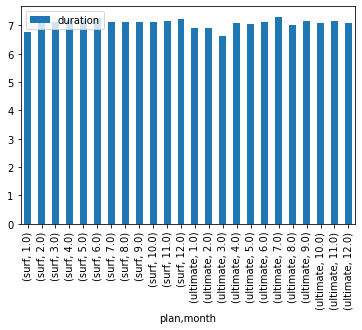

In [73]:
# Compares average duration of calls per each plan per each distinct month. Plots a bar plat to visualize it.

user_data.head()

call_duration_monthly = call_data.merge(user_data[['user_id','plan']], on = 'user_id', how = 'outer') 

pd.pivot_table(call_duration_monthly, values = 'duration', index = ['plan','month'], aggfunc='mean').plot(kind='bar');


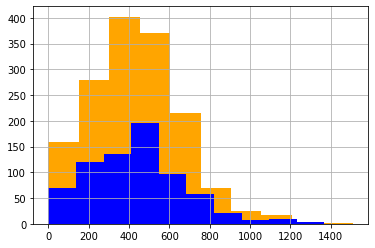

In [74]:
# Compare the number of minutes users of each plan require each month. Plot a histogram.

user_data_surf = user_data_total.query('plan == "surf"')

user_data_ult = user_data_total.query('plan == "ultimate"')

user_data_surf['monthly_minutes'].hist(color='orange');

user_data_ult['monthly_minutes'].hist(color='blue');


In [75]:
# Calculate the mean and the variance of the monthly call duration

pd.pivot_table(user_data_total, values = 'monthly_minutes', index = 'plan', aggfunc=['mean','var','min','max'])

,mean,var,min,max
,monthly_minutes,monthly_minutes,monthly_minutes,monthly_minutes
plan,,,,
surf,436.519741,52571.063243,0.0,1510.0
ultimate,434.676017,56573.632247,0.0,1369.0


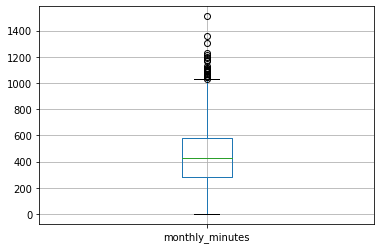

In [76]:
# Plot a boxplot to visualize the distribution of the monthly call duration

user_data_surf.boxplot(column='monthly_minutes'); # Plots monthly minutes for Surf plan


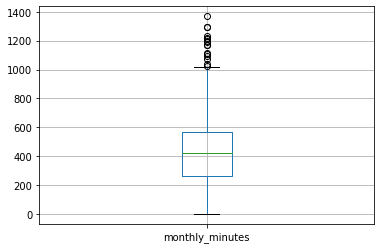

In [77]:
user_data_ult.boxplot(column='monthly_minutes'); # Plots monthly minutes for Ultimate plan

**Observations on Calls**
* The distribution of call data is similar across both plans. 
* The monthly average minutes and distribution of minutes are similar across both plans. 

### Messages

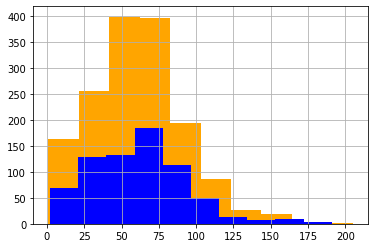

In [78]:
# Compare the number of messages users of each plan tend to send each month

user_data_surf['monthly_messages'].hist(color='orange');

user_data_ult['monthly_messages'].hist(color='blue');

In [79]:
pd.pivot_table(user_data_total, values = 'monthly_messages', index = 'plan', aggfunc=['mean','var','min','max'])

,mean,var,min,max
,monthly_messages,monthly_messages,monthly_messages,monthly_messages
plan,,,,
surf,60.895793,977.690559,1.0,205.0
ultimate,61.221599,1079.470488,2.0,191.0


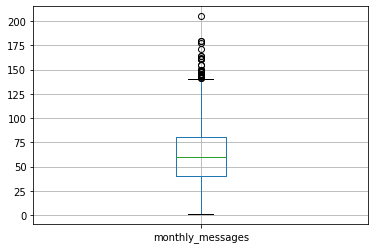

In [80]:
user_data_surf.boxplot(column='monthly_messages'); # Plots monthly minutes for Surf plan

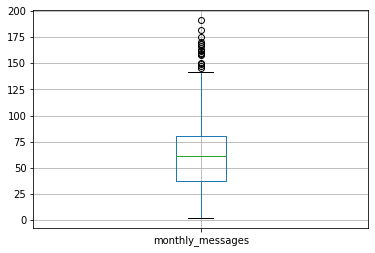

In [81]:
user_data_ult.boxplot(column='monthly_messages'); # Plots monthly minutes for Ultimate plan

**Observations on Messages**
* The distribution of message data is similar across both plans. 
* The monthly average messages and distribution of messages are similar across both plans. 
* The ultimate plan seems to have more users with a slighlty higher number of users that send more than 100 messages a month. 

### Internet

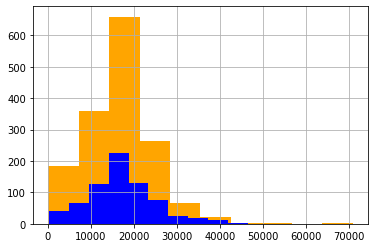

In [82]:
# Compare the amount of internet traffic consumed by users per plan

user_data_surf['internet_mb'].hist(color='orange');

user_data_ult['internet_mb'].hist(color='blue');


In [83]:
pd.pivot_table(user_data_total, values = 'internet_mb', index = 'plan', aggfunc=['mean','var','min','max'])

,mean,var,min,max
,internet_mb,internet_mb,internet_mb,internet_mb
plan,,,,
surf,16717.702137,6.216823e+07,92.31,70931.59
ultimate,17238.642253,6.132485e+07,233.17,46595.33


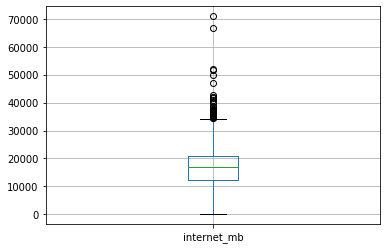

In [84]:
user_data_surf.boxplot(column='internet_mb'); # Plots monthly minutes for Surf plan

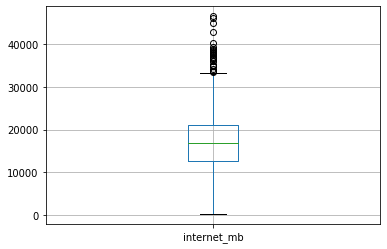

In [85]:
user_data_ult.boxplot(column='internet_mb'); # Plots monthly minutes for Ultimate plan

**Observations on Internet**
* The distribution of internet data is similar across both plans. 
* The monthly average internet usage is similar across both plans. 
* The minimum usage of users of the ultimate plan is much higher than users of the surf plan.

## Revenue

In [86]:
# Looks at description of revenue data

pd.pivot_table(user_data_total, values = ['surf_revenue','ultimate_revenue'], index = 'plan', aggfunc=['mean','var','min','max'])

mean                           var                   \
         surf_revenue ultimate_revenue surf_revenue ultimate_revenue   
plan                                                                   
surf            60.88              NaN  3073.268836              NaN   
ultimate          NaN        72.304288          NaN       129.331103   

                  min                           max                   
         surf_revenue ultimate_revenue surf_revenue ultimate_revenue  
plan                                                                  
surf             20.0              NaN       590.91              NaN  
ultimate          NaN             70.0          NaN            182.0

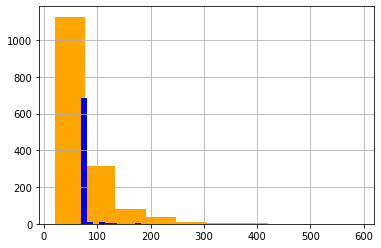

In [87]:
# Compare the amount of revenue generated by users per plan

user_data_surf['surf_revenue'].hist(color='orange');

user_data_ult['ultimate_revenue'].hist(color='blue');

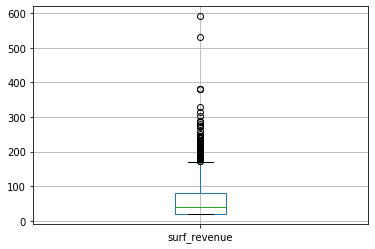

In [88]:
# Creates a boxplot 

user_data_total.boxplot(column='surf_revenue'); 

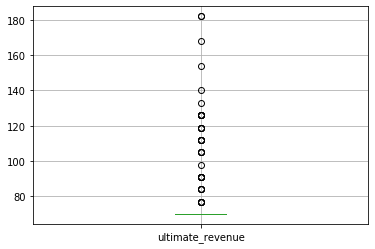

In [89]:
# Creates a boxplot 

user_data_total.boxplot(column='ultimate_revenue'); 

**Observations on Revenue Per Plan**
* The revenue for the Surf plan appears to exceed that of the Ultimate plan.
* While the Ultimate plan has a few outliers, the maximum is still below that of the Surf plan, and the majority of Ultimate users play close to the minimum ($70).

## Regions

In [90]:
user_data_total = user_data_total.merge(user_data[['user_id','region']], on = 'user_id', how = 'outer') 

user_data_total.head()

,user_id,month,monthly_calls,monthly_minutes,monthly_messages,internet_mb,plan,surf_revenue,ultimate_revenue,total_revenue,region
0,1000,12.0,16.0,124.0,16.0,1901.47,ultimate,NaN,70.0,70.00,Other
1,1001,8.0,27.0,182.0,27.0,6919.15,surf,20.00,NaN,20.00,Other
2,1001,9.0,49.0,315.0,49.0,13314.82,surf,20.00,NaN,20.00,Other
3,1001,10.0,65.0,393.0,65.0,22330.49,surf,90.45,NaN,90.45,Other
4,1001,11.0,64.0,426.0,64.0,18504.30,surf,60.42,NaN,60.42,Other


In [91]:
# Looks at description of revenue data

pd.pivot_table(user_data_total, values = ['total_revenue'], index = 'region', aggfunc=['mean','var','min','max'])

,mean,var,min,max
,total_revenue,total_revenue,total_revenue,total_revenue
region,,,,
NY-NJ,61.617234,2108.786755,20.0,280.00
Other,65.235011,2192.889259,20.0,590.91


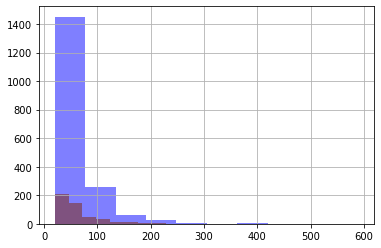

In [92]:
# Compare the amount of revenue generated by users per region

Region1 = user_data_total.loc[user_data_total['region'] == "NY-NJ"]
Region2 = user_data_total.loc[user_data_total['region'] == "Other"]

Region1['total_revenue'].hist(color='orange');

Region2['total_revenue'].hist(color='blue', alpha=0.5);

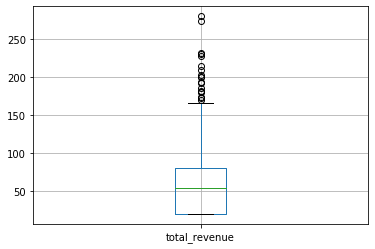

In [93]:
# Creates a boxplot 

Region1.boxplot(column='total_revenue'); 

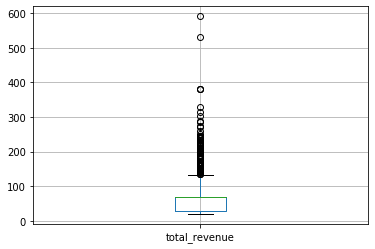

In [94]:
# Creates a boxplot 

Region2.boxplot(column='total_revenue'); 

**Observations on Revenue Per Region**
* The revenue per region does not have a similar variance. 
* The means are similar, but the "Other" region has a larger maximum and number of users that bring in more revenue.

## Test statistical hypotheses

**Null hypothesis:**
The average revenue from users of the Ultimate plan equals the average mean of users of the Surf plan.

**Alternative hypothesis:**
The average revenue from users of the Ultimate plan does not equal the average mean of users of the Surf plan.

**Statistical test** I will calculate a t-test for the two independent samples of the populations using scipy.stats.ttest_ind

**Alpha** 0.05

In [95]:
# Test the hypotheses

surf_revenue = surf_users['total_revenue'].values.tolist()
ult_revenue = ultimate_users['total_revenue'].values.tolist()
alpha = 0.05

results = st.ttest_ind(surf_revenue, ult_revenue, equal_var = True)
print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("We reject the null hypothesis.")
else:
    print("We can't reject the null hypothesis.")

p-value:  4.5141205593216715e-08
We reject the null hypothesis.


In [96]:
# Test a one-tailed hypothesis 

surf_revenue = surf_users['total_revenue'].values.tolist()
ult_revenue = ultimate_users['total_revenue'].values.tolist()
alpha = 0.05

results = st.ttest_ind(surf_revenue, ult_revenue, equal_var = True)
print('p-value: ', results.pvalue)

if (results.pvalue / 2 < alpha) and (ult_revenue > surf_revenue):
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis") 

p-value:  4.5141205593216715e-08
We reject the null hypothesis


**Null hypothesis:**
The average revenue from users in the NY-NJ area equals the average mean of users in other regions.

**Alternative hypothesis:**
The average revenue from users in the NY-NJ area does not equal the average mean of users in other regions.

**Statistical test** I will calculate a t-test for the two independent samples of the populations using scipy.stats.ttest_ind

**Alpha** 0.05

In [97]:
# Test the hypotheses

NY_NJ = Region1['total_revenue'].values.tolist()
Other = Region2['total_revenue'].values.tolist()
alpha = 0.05

results = st.ttest_ind(NY_NJ, Other, equal_var=False)
print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("We reject the null hypothesis.")
else:
    print("We can't reject the null hypothesis.")

p-value:  0.1243523506963018
We can't reject the null hypothesis.


## General conclusion

**We rejected the following null hypothesis: The average revenue from users of the Ultimate plan equals the average mean of users of the Surf plan.**

For this analysis we used a t-test for two independent samples, with the assumption that the variance was equal across samples. This assumption was based on our descriptive analysis above. 


**We cannot reject the following hypothesis: The average revenue from users in the NY-NJ area equals the average mean of users in other regions.**

For this analysis we used a t-test for two independent samples, with the assumption that the variance was not equal across samples. This assumption was based on our descriptive analysis above.

**Business Summary**
* Monthly utilization -- including the number of messages, number of calls, duration of calls and internet usage -- was similar across both plans. 
* While the Ultimate plan has a higher base price, it also includes more free messages, minutes and data. 
* The Surf plan has more than double the amount of unique users (339) as the Ultimate Plan (161). 
* While the average monthly revenue per user is slightly higher for Ultimate plan users, there are more users with extremely high utilization among Surf users.
* The statistical test showed that there was as signficant difference between the average monthly revenue of Surf Users and Ultimate users. Ultimate users have a higher average monthly revenue, showing that this plan is more profitable to the company. 
* There is no sigificant variation in revenue in the NY-NJ region compared to all other regions. 